### Importing Packages and Load Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [4]:
data = pd.read_csv('./wine_data.csv',header=None,usecols=[0,1,2])
data.columns = ['Class label', 'Alcohol', 'Malic acid']

In [5]:
data.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


### Data Visulization

<Axes: xlabel='Alcohol', ylabel='Density'>

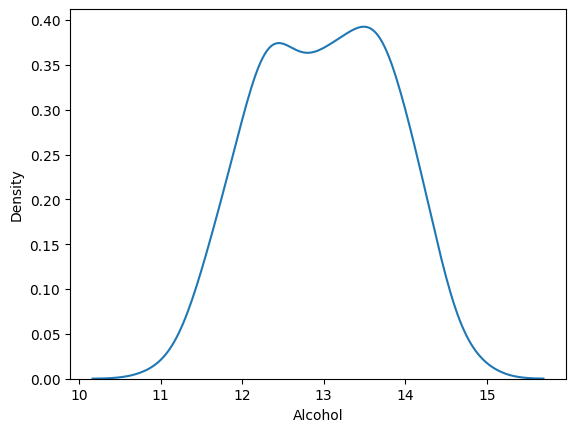

In [6]:
sns.kdeplot(data['Alcohol']) 

<Axes: xlabel='Malic acid', ylabel='Density'>

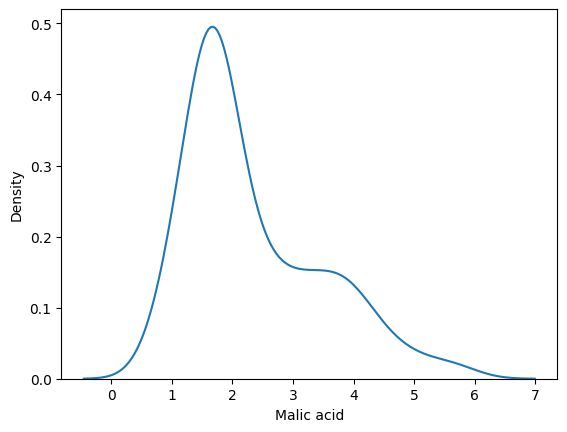

In [7]:
sns.kdeplot(data['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

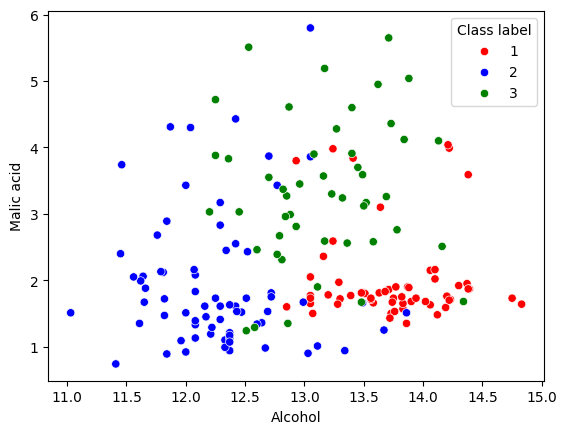

In [8]:
color_dict = {
    1:'red',
    2:'blue',
    3:'green'
}
sns.scatterplot(x='Alcohol',y='Malic acid',hue='Class label',data=data,palette=color_dict)

### Train Test Split

In [9]:
X_train, X_test,y_train,y_test = train_test_split(data.drop('Class label',axis=1),data['Class label'],test_size=0.3,random_state=0)

### Normalization (Min-Max Scaling)

In [10]:
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [12]:
np.round(X_train.describe(),2)

,Alcohol,Malic acid
count,124.00,124.00
mean,12.98,2.38
std,0.80,1.14
min,11.03,0.89
25%,12.36,1.61
50%,13.04,1.88
75%,13.64,3.25
max,14.75,5.65


In [13]:
np.round(X_train_scaled.describe(),2)

,Alcohol,Malic acid
count,124.00,124.00
mean,0.53,0.31
std,0.22,0.24
min,0.00,0.00
25%,0.36,0.15
50%,0.54,0.21
75%,0.70,0.50
max,1.00,1.00


### Effect of Scaling

Text(0.5, 1.0, 'After Scaling')

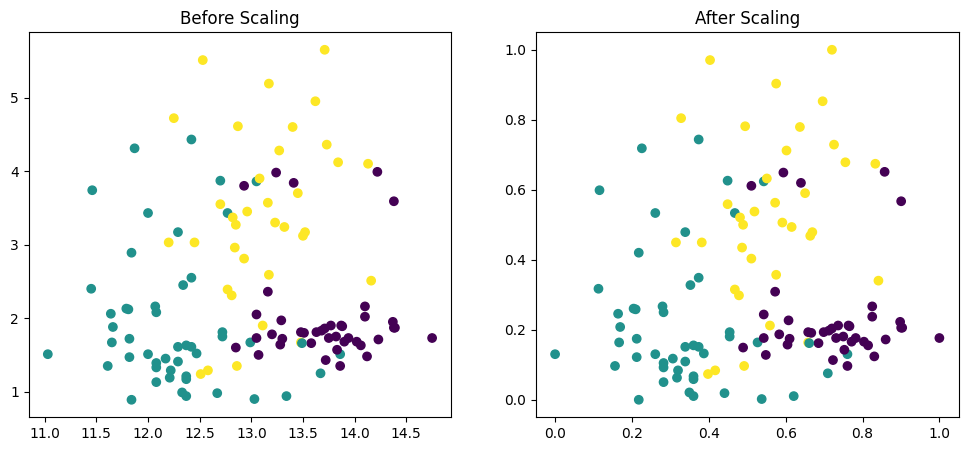

In [14]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Alcohol'],X_train['Malic acid'],c=y_train)
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic acid'],c=y_train)
ax2.set_title('After Scaling')

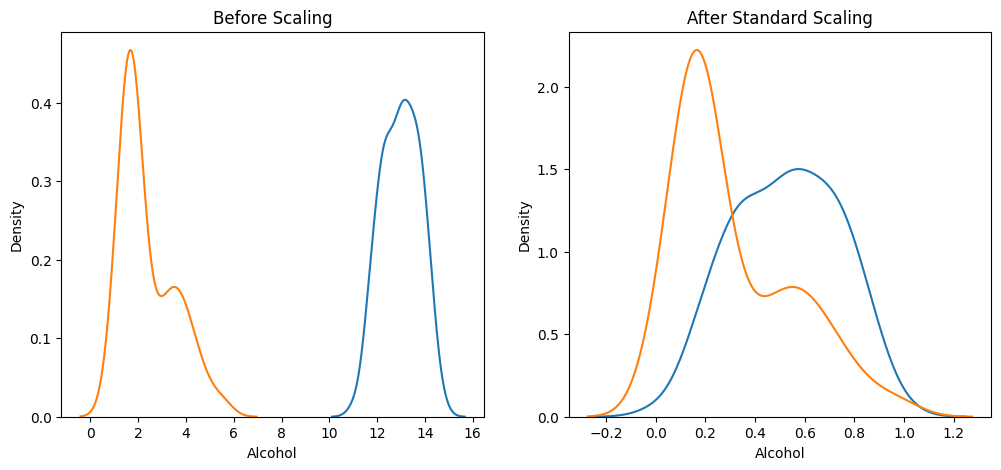

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

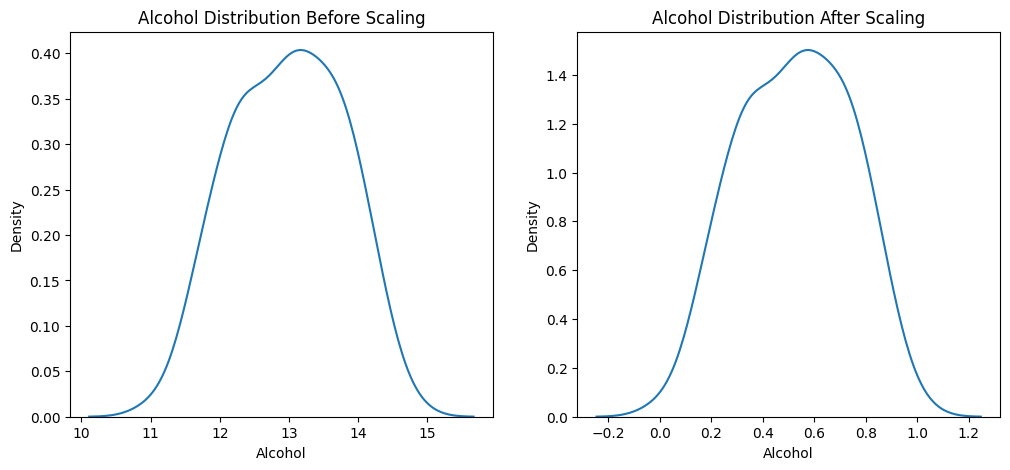

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

ax2.set_title('Alcohol Distribution After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

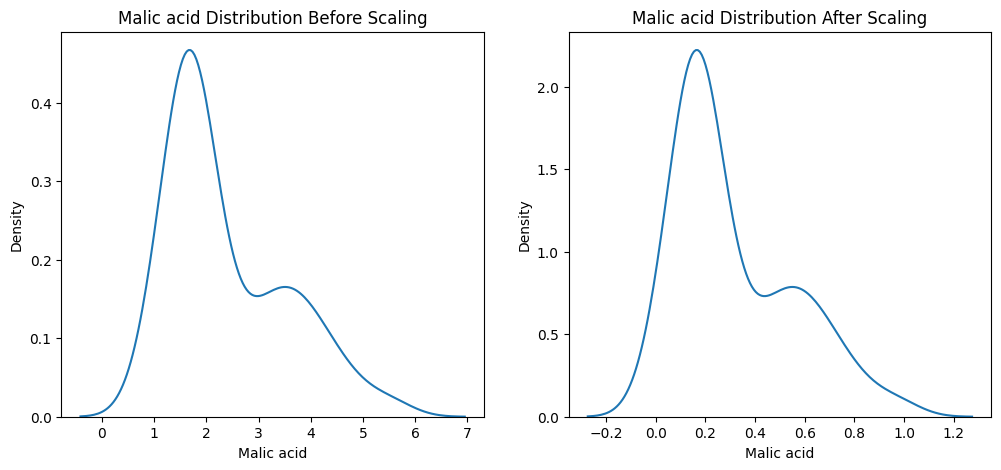

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

ax2.set_title('Malic acid Distribution After Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()